# Discovering chemicals in patents by assessing their findability
 Prevalent sections in patent documents capturing compound information

# Import Modules

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add path constants

In [2]:
FIG_DIR = 'data/figures'

In [3]:
os.makedirs(FIG_DIR, exist_ok=True)

# Load data file

In [4]:
file = pd.read_csv('data/EDA_df.txt.gz', sep='\t', compression='gzip')

In [5]:
file.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description
1,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2838373-A2,2015-02-25,Description


In [6]:
year_list = []
for row in file['PUBLICATION_DATE']:
    g = row.split('-')[0]
    year_list.append(g) 

In [7]:
len(year_list)

133512452

In [8]:
file['Year'] = year_list
file.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field,Year
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description,2015
1,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2838373-A2,2015-02-25,Description,2015


In [9]:
file['SureChEMBL_ID'].nunique()

10718652

In [10]:
file['PATENT_ID'].nunique()

1574602

# Filtering unique compounds per year

In [11]:
unique_cpds_id = file.drop_duplicates(subset=["SureChEMBL_ID", "Year"], keep='first')
unique_cpds_id.reset_index(drop=True, inplace=True)

In [12]:
unique_cpds_id.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field,Year
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description,2015
1,SCHEMBL9,O=C(O)\C=C/C(=O)O.CCOC(=O)[C@H](CCC1=CC=CC=C1)...,OYFJQPXVCSSHAI-QFPUQLAESA-N,EP-2838373-A2,2015-02-25,Description,2015


In [13]:
len(unique_cpds_id)

21911648

# Calculate Fields for unique compounds per year

In [14]:
f = pd.DataFrame(unique_cpds_id['Field'].value_counts())
f.reset_index(level=0, inplace=True)

In [15]:
f

,Field,count
0,Image (for patents after 2007),9423500
1,Description,9211890
2,Claims,2010274
3,MOL Attachment (US patents after 2007),1242682
4,Abstract,17561
5,Title,5741


In [16]:
f['Field'] = f['Field'].str.replace('Image (for patents after 2007)','Image')
f['Field'] = f['Field'].str.replace('MOL Attachment (US patents after 2007)','MOL Attachments')

# Visualisation

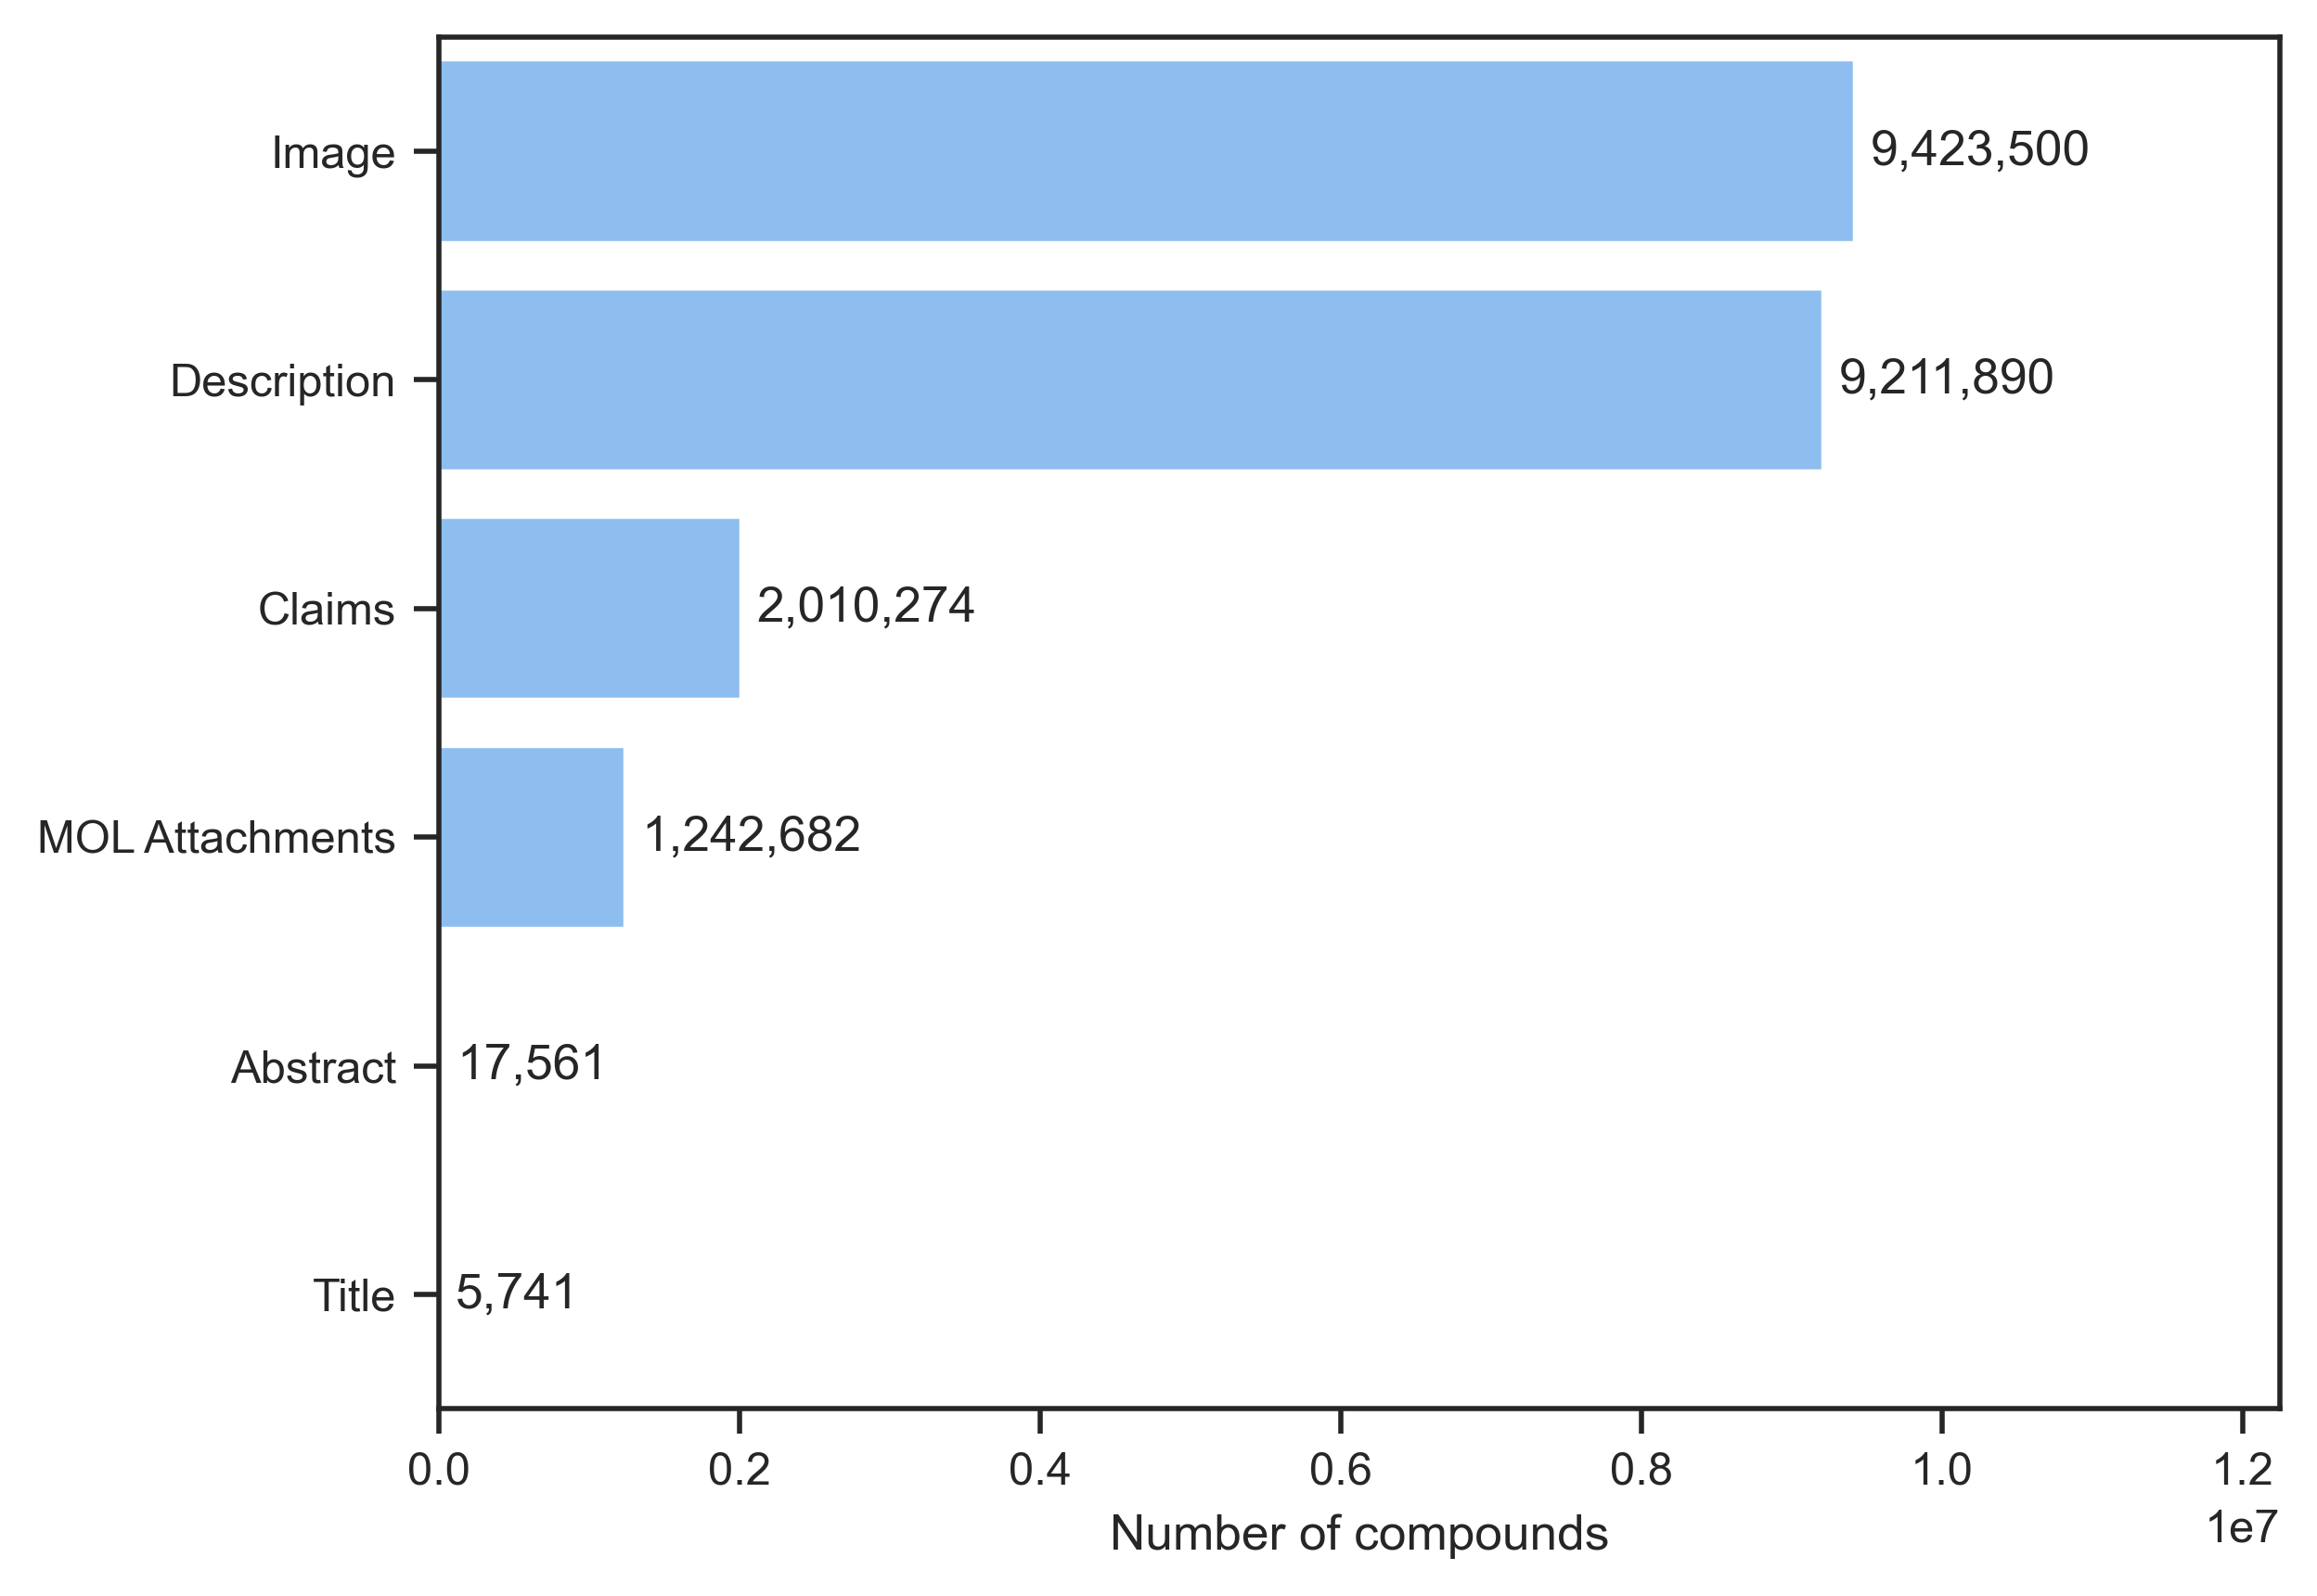

In [18]:
ax = sns.barplot(data=f, x= f['count'], y= f['Field'], orient='h', color = '#7dbeff')
sns.set(context='paper')
sns.set_style('ticks')
ax.set(ylabel=None)
plt.xlabel("Number of compounds")
plt.rcParams['figure.dpi'] = 400
plt.rcParams.update({'axes.xmargin': 0.3})


for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues], padding= 3)

plt.savefig(f'{FIG_DIR}/figure_4.png', dpi=400)
plt.show()